In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from sklearn import linear_model

Linear Regression can be solved in two ways:
- Using Normal Equation;
- Using Gradient Descent;

We will see these two options. But first, let's generate datasets

# Generate datasets


In [2]:
# Let`s define some constants 
NUM_SAMPLES = 100
# Use target function with bias=2 and theta=4
TARGET_FUNCTION = lambda X: 2+4*X

Our target function is *2+4*X* 

It is important to remember it to check results

In [3]:
# our X axis data
X = 2*np.random.rand(NUM_SAMPLES, 1)
# data + bias in one array for easier calculations
X_b = np.c_[X, np.ones((NUM_SAMPLES, 1))]
# weights array
w = np.array([0., 0.])
# create Y axis values with some noise
y = TARGET_FUNCTION(X) + np.random.randn(X.shape[0], 1)

print("Now we have data with shapes:")
X.shape, X_b.shape, y.shape

Now we have data with shapes:


((100, 1), (100, 2), (100, 1))

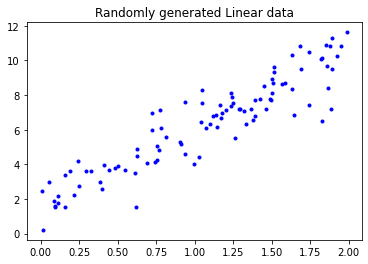

In [4]:
fig = plt.figure()
plt.plot(X, y, "b.")
plt.title("Randomly generated Linear data")
plt.show()

# 1. Solve linear regression

Let's implement 4 different ways to solve linear regression problem

## 1.1 Using sklearn
We will use Linear Regression model from [sklearn](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) 

In [5]:
lr = linear_model.LinearRegression().fit(X=X, y=y)
print(f"sklearn linear regression: a={lr.coef_}, b={lr.intercept_}")
print(f"for a*x+b    ===    {lr.coef_[0]}*x+{lr.intercept_}")

sklearn linear regression: a=[[4.32969593]], b=[1.72319235]
for a*x+b    ===    [4.32969593]*x+[1.72319235]


In [6]:
# predict on values 5 and 50
lr.predict([[5], [50]])

array([[ 23.37167202],
       [218.20798905]])

As you can see, results from sklearn is close to target function

## 1.2 Using Normal Equation

Normal equation - is an easy way to solve linear regression. 

> Normal Equation is an analytical approach to Linear Regression with a Least Square Cost Function.

Check it out - https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/

In [7]:
theta_cap = np.linalg.inv((X_b.T.dot(X_b))).dot(X_b.T).dot(y)

In [8]:
theta_cap

array([[4.32969593],
       [1.72319235]])

It is close to our target function!

In [9]:
a = np.array([[1], [2]])

np.linalg.inv(a.T.dot(a))

array([[0.2]])

## 1.3 Using Gradient Descent

We must find w0 and w1 (bias) to get the best fitting line.

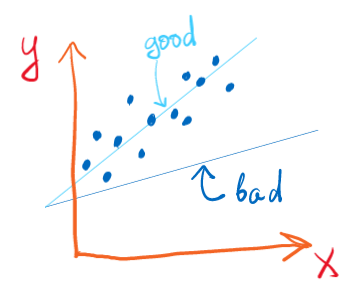

Function to predict values. According to our neural network:

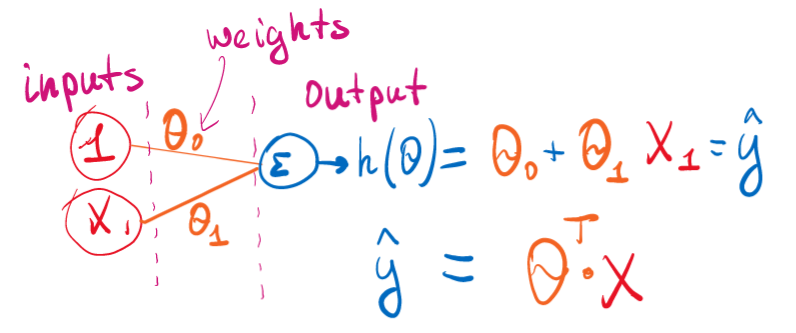

In [10]:
def predict(X, w):
    return w[1] + w[0] * X

predict(X, w)[:3]

array([[0.],
       [0.],
       [0.]])

To deside which line (coefficients) is the best we need to minimize error that is given in a cost function. I will use MSE cost function.

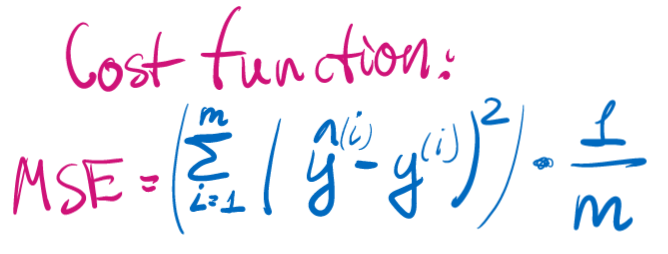

In [11]:
y_true, y_pred = np.array([3, 9]), np.array([30, 90])

def mse(y_true, y_pred):
    return (np.sum((y_true - y_pred)**2))/len(y_true)

mse(y_true, y_pred)

3645.0

Define some constants for learning process

In [12]:
LEARNING_RATE = 0.0015
EPOCHS = 7000
w = np.array([0., 0.])
w

array([0., 0.])

Let's see regression line (red dots) before training 

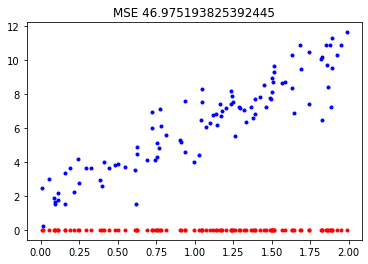

In [13]:
def visualize_training(X, y, y_pred):
    fig = plt.figure()
    plt.plot(X, y, "b.")
    plt.plot(X, y_pred, "r.")
    plt.title(f"MSE {mse(y, y_pred)}")
    plt.show()
    
visualize_training(X, y, predict(X, w))

In [14]:
print("Again, our data:")
X.shape, w.shape, y.shape

Again, our data:


((100, 1), (2,), (100, 1))

Define variables to store training history 

In [15]:
MSEs = []
best_mse = 10e10
best_w = np.array([0, 0])

Train regression model using Dm and Dc - partial derivatives of our error MSE function with respect to m and c. Because we need to find best m and c such that our error function gets smaller.

For more information see:
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931 (The Gradient Descent Algorithm)
- https://builtin.com/data-science/gradient-descent

-16.182843613991178 -12.617544058721053
Step 0 - MSE: 46.975193825392445, weights: [0.02427427 0.01892632]
-0.17706631035177758 0.1868963617156586
Step 1000 - MSE: 1.1872769043740894, weights: [3.75411115 2.42624315]
-0.10585150460229906 0.13050841030051508
Step 2000 - MSE: 1.1205662475278775, weights: [3.95506427 2.18519124]
-0.06928443665640939 0.08544332525039178
Step 3000 - MSE: 1.0919957973412746, weights: [4.08445083 2.02563494]
-0.04535604510370285 0.055934244841341935
Step 4000 - MSE: 1.0797519969819505, weights: [4.16914977 1.92118202]
-0.02969167899692615 0.03661654449387195
Step 5000 - MSE: 1.0745049446440162, weights: [4.22459671 1.85280342]
-0.01943722826603501 0.02397049131897779
Step 6000 - MSE: 1.0722563324950882, weights: [4.26089425 1.80804036]


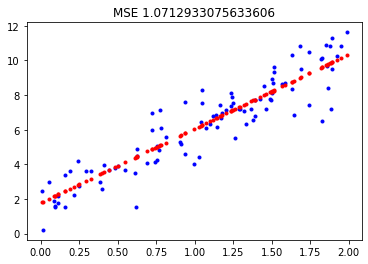

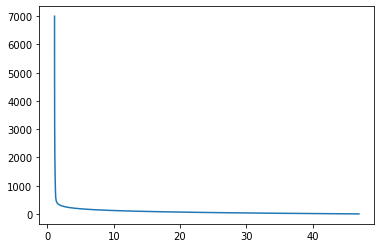

In [16]:
for i in range(EPOCHS):
    # training part:
    y_pred = predict(X, w)
    Dm = np.sum(X*(y-y_pred.reshape(-1, 1))) * -2/len(X)
    Dc = np.sum(y-y_pred.reshape(-1, 1)) * -2/len(X)
    # update weights
    w += [-LEARNING_RATE * Dm, -LEARNING_RATE * Dc]
    
    # not training part:
    # save mse values
    mse_val = mse(y, y_pred)
    MSEs.append(mse_val)
    
    # save best mse (we need the smallest)
    if 0 < mse_val < best_mse:
        best_mse = mse_val
        best_w = w.copy()
    
    # just to visualize results
    if i % 1000 == 0:
        print(Dm, Dc)
        print(f"Step {i} - MSE: {mse_val}, weights: {w}")
    
    if i == EPOCHS - 1:
        visualize_training(X, y, y_pred)
        
# Plot MSEs graph
plt.plot(MSEs, np.arange(len(MSEs)))

The last graph is our error function. As you can see its values get smaller. Ideally we need to find zero or the smallest values. 

Given graph is probably good according to the tutorial section - [How to Make Sure It Works Properly](https://builtin.com/data-science/gradient-descent) 

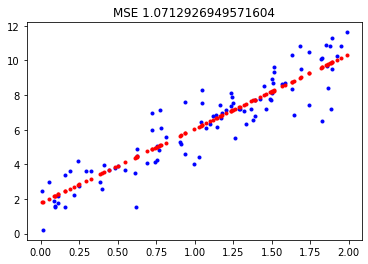

[4.28463682 1.77876041] 1.0712933075633606


In [17]:
# copy best weights 
w = best_w.copy()
# predict X on this weights to build regression line
y_pred = predict(X, w)

visualize_training(X, y, y_pred)
print(best_w, best_mse)

It is close to our target function again!

## 1.4 Using PyTorch

PyTorch is an awesome libraries that helps a lot. For example it can automatically calculate gradients of your variables.

Imagine we have function y = 2*x, we can calculate its gradient very easilly:

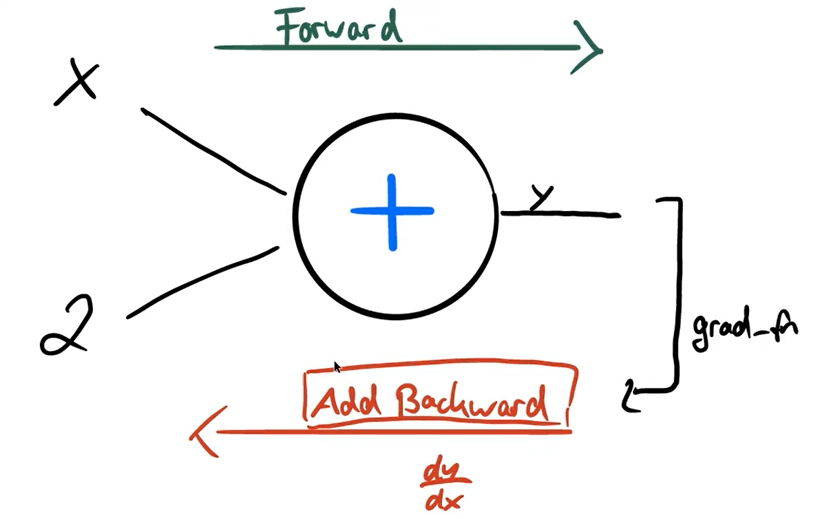

An image was taken from - https://www.youtube.com/watch?v=DbeIqrwb_dE&t=810s

We need to cast Numpy Array to Tensor

In [36]:
# define model params
input_dim = 1
output_dim = 1
learning_rate = 0.01
epochs = 150
device = "cuda" if torch.cuda.is_available() else "cpu"

In [37]:
from torch.autograd import Variable

X_tensor = Variable(torch.from_numpy(X.astype("float32")).to(device))
y_tensor = Variable(torch.from_numpy(y.astype("float32")).to(device))

In [38]:
# define model
class LinearRegression(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = torch.nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
model = LinearRegression(input_dim, output_dim).to(device)

In [39]:
# initialize loss & optimization functions
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), learning_rate)

In [40]:
# train model
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    
    optimizer.step()
    
    # print each 10 epochs
    if epoch % 10 == 0:
        print(f"epoch {epoch}, loss {loss.item()}")

epoch 0, loss 40.2657470703125
epoch 10, loss 16.344877243041992
epoch 20, loss 7.0399932861328125
epoch 30, loss 3.419588088989258
epoch 40, loss 2.010049343109131
epoch 50, loss 1.460433840751648
epoch 60, loss 1.2453336715698242
epoch 70, loss 1.1604053974151611
epoch 80, loss 1.1261733770370483
epoch 90, loss 1.1117234230041504
epoch 100, loss 1.1050299406051636
epoch 110, loss 1.1014117002487183
epoch 120, loss 1.0990456342697144
epoch 130, loss 1.0972191095352173
epoch 140, loss 1.0956525802612305


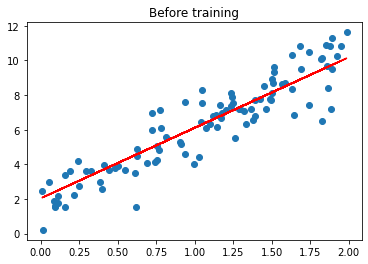

In [41]:
# Let's build regression line
y_pred = model(X_tensor)
plt.scatter(X_tensor, y_tensor)
plt.plot(X_tensor, y_pred.detach().numpy(), color="red")
plt.title("Before training")
plt.show()

As you can see, the model predicts very well!